In [4]:
using LightGraphs, PyPlot

INFO: Recompiling stale cache file /Users/yosikim/.julia/lib/v0.6/CodecZlib.ji for module CodecZlib.
INFO: Recompiling stale cache file /Users/yosikim/.julia/lib/v0.6/LightGraphs.ji for module LightGraphs.


In [7]:
include("code/BGSM_general.jl");
include("code/BGSM_effective_resistance.jl");
include("code/model_selection.jl");

In [8]:
m = 21;
x = linspace(-1,1,m); loc_x = repeat(x,inner = m);
y = linspace(-1,1,m); loc_y = repeat(y,outer = m);
Th = cos.(sqrt.(x.^2 .+ y'.^2) * pi/2);
Theta = 5 * ceil.(2.8 * Th - 0.2);
theta = Theta[:]; n = length(theta);
sigma = 1.0;
srand(1);
y = theta + sigma * randn(n); Y = reshape(y,21,21);
g = Grid([21;21]; periodic=false);
A = adjacency_matrix(g);
D = -full(incidence_matrix(g, oriented = true))';

# BGSM general fitting
out = BGSM_general(y,D, v0 = 1e-3 * 10, v1 = 1e4, b = sum(size(D)), verbose = true)
# model selection result
ms = model_selection(out);

A data "y" has input of length "n" = 441
A graph incidence matrix "D" has input of size ("m" = 840,"p" = 441)
A design matrix "X" has no input: use speye(n) as a default, "n" = 441
A support vector "w" has no input: use ones(p) as a default, "p" = 441
"w" seems an eigenvector of "X'*X". We use a simpler algorithm.
We initialize at "α" = mean(y), "θ" = y-α, "σ^2" = var(y) and "η" = 1/2
iteration: 8, error: 9.48e-13
the algorithm converges at 8-th iteration
A data "y" has input of length "n" = 441
A graph incidence matrix "D" has input of size ("m" = 840,"p" = 441)
A design matrix "X" has no input: use speye(n) as a default, "n" = 441
A support vector "w" has no input: use ones(p) as a default, "p" = 441
"w" seems an eigenvector of "X'*X". We use a simpler algorithm.
We initialize at "α" = mean(y), "θ" = y-α, "σ^2" = var(y) and "η" = 1/2
iteration: 9, error: 4.37e-11
the algorithm converges at 9-th iteration


Dict{Symbol,Any} with 12 entries:
  :c         => Array{Int64,1}[[1, 2, 3, 4, 22, 23, 24, 43, 44, 64], [5, 6, 7, …
  :score     => 1712.96
  :w         => [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.…
  :t_reduced => [-4.88839, 0.0246834, -2.26613, -6.0073, 5.04008, 9.99413, -3.5…
  :each      => (59.391, 13.6193, 1639.95)
  :X         => [1.0 0.0 … 0.0 0.0; 1.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 1.0 0.0; 0…
  :A         => [0 1 … 0 0; 1 0 … 1 1; … ; 0 1 … 0 1; 0 1 … 1 0]
  :s         => 15
  :Xt        => [-4.88839, -4.88839, -4.88839, -4.88839, 0.0246834, 0.0246834, …
  :H         => [10.0001 -0.0001 … -1.41873e-21 -1.52198e-22; -0.0001 108.001 ……
  :t_full    => [-4.88839, -4.88839, -4.88839, -4.88839, 0.0246834, 0.0246834, …
  :L         => [0.0001 -0.0001 … 0.0 0.0; -0.0001 0.0009 … -0.0001 -0.0001; … …

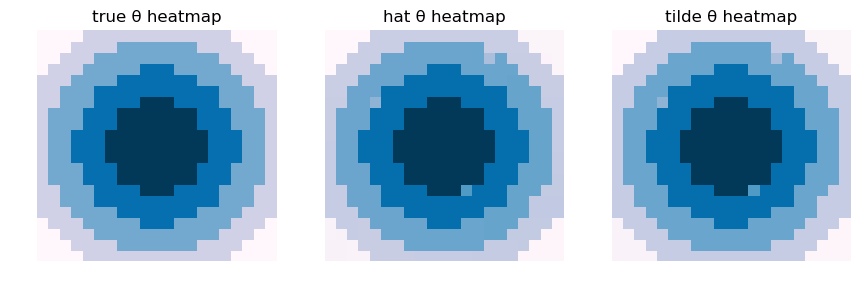

misclassificiation rate: 0.0131


In [9]:
fig = figure(figsize = (10.5,3));
subplot(131); pcolormesh(Theta, cmap = "PuBu"); axis("off"); title("true θ heatmap");
subplot(132); pcolormesh(reshape(out[:alpha] + out[:theta],21,21), cmap = "PuBu"); axis("off"); title("hat θ heatmap");
subplot(133); pcolormesh(reshape(ms[:t_full],21,21), cmap = "PuBu"); axis("off"); title("tilde θ heatmap");
hat_gamma = (out[:q] .> 0.5); gamma = (D*theta .== 0);
missed = sum(gamma .* (1-hat_gamma)) + sum((1-gamma) .* hat_gamma)
println("misclassificiation rate: ", round(missed/out[:m],4));

In [11]:
# BGSM effective resistance
R = effective_resistance(g, D)
out = BGSM_effective_resistance(y, D, R, v0 = 1e-3 * 10, v1 = 1e4, b = sum(size(D)), verbose = true)
# model selection result
ms = model_selection(out);

A data "y" has input of length "n" = 441
A graph incidence matrix "D" has input of size ("m" = 840,"p" = 441)
A design matrix "X" has no input: use speye(n) as a default, "n" = 441
A support vector "w" has no input: use ones(p) as a default, "p" = 441
"w" seems an eigenvector of "X'*X". We use a simpler algorithm.
We initialize at "α" = mean(y), "θ" = y-α, "σ^2" = var(y) and "η" = 1/2
iteration: 9, error: 4.37e-11
the algorithm converges at 9-th iteration


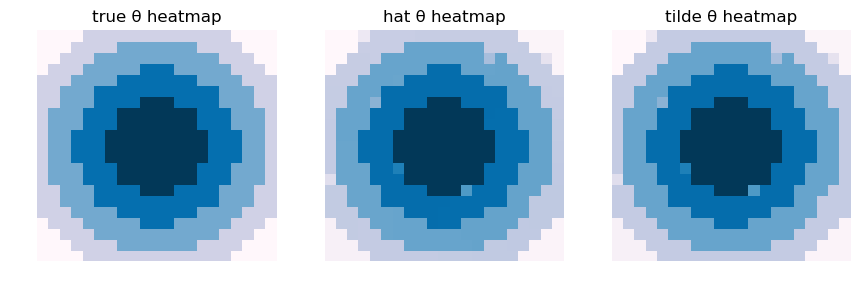

misclassificiation rate: 0.0214


In [12]:
fig = figure(figsize = (10.5,3));
subplot(131); pcolormesh(Theta, cmap = "PuBu"); axis("off"); title("true θ heatmap");
subplot(132); pcolormesh(reshape(out[:alpha] + out[:theta],21,21), cmap = "PuBu"); axis("off"); title("hat θ heatmap");
subplot(133); pcolormesh(reshape(ms[:t_full],21,21), cmap = "PuBu"); axis("off"); title("tilde θ heatmap");
hat_gamma = (out[:q] .> 0.5); gamma = (D*theta .== 0);
missed = sum(gamma .* (1-hat_gamma)) + sum((1-gamma) .* hat_gamma)
println("misclassificiation rate: ", round(missed/out[:m],4));

In [13]:
srand(1);
n = 100; p = 200;
X = randn(n,p); X1 = [zeros(n) X];
w = [1;zeros(p)];
t = [zeros(Int(4*p/5));5.0*ones(Int(p/5))]
y = X*t + randn(n);
g = Graph(p+1);
for i = 1:p
    add_edge!(g,(1,i+1))
end
A = adjacency_matrix(g);
D = full(incidence_matrix(g, oriented = true))';
# fitting BGSM_general
out = BGSM_general(y, D, v0 = 1e-1*0.8, X = X1, w = w, A = size(D,2), b = sum(size(D)), nu = Inf)
# model selection result
ms = model_selection(out);

A data "y" has input of length "n" = 100
A graph incidence matrix "D" has input of size ("m" = 200,"p" = 201)
We initialize at "α" = mean(y), "θ" = y-α, "σ^2" = var(y) and "η" = 1/2
iteration: 10, error: 5.01e-04
iteration: 20, error: 2.43e-03
iteration: 30, error: 2.97e-04
iteration: 38, error: 6.64e-13
the algorithm converges at 38-th iteration


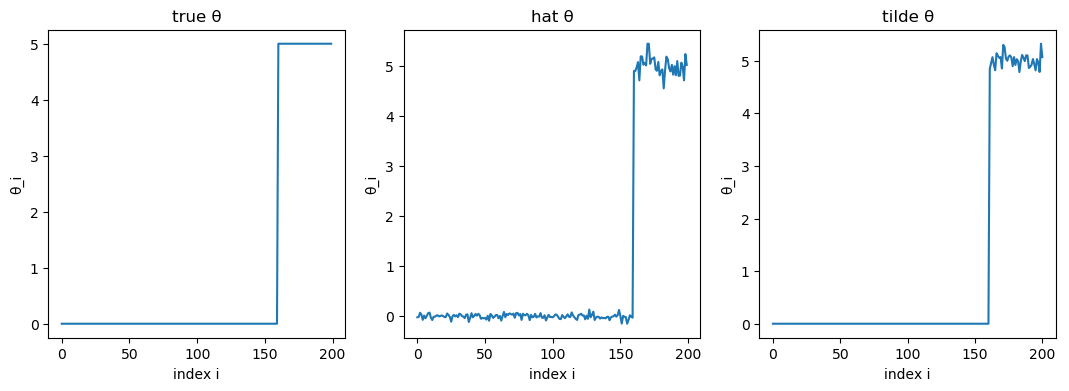

misclassificiation rate: 0.0


In [14]:
fig = figure(figsize = (13,4));
subplot(131); plot(t); xlabel("index i"); ylabel("θ_i"); title("true θ");
subplot(132); plot(out[:delta]); xlabel("index i"); ylabel("θ_i"); title("hat θ");
subplot(133); plot(ms[:t_full]); xlabel("index i"); ylabel("θ_i"); title("tilde θ");
hat_gamma = (out[:q] .> 0.5); gamma = (t .== 0);
missed = sum(gamma .* (1-hat_gamma)) + sum((1-gamma) .* hat_gamma);
println("misclassificiation rate: ", round(missed/out[:m],4));

In [16]:
# fitting BGSM_effective_resistance
R = effective_resistance(g, D);
out = BGSM_effective_resistance(y, D, R, v0 = 1e-1*0.8, X = X1, w = w, A = size(D,2), b = sum(size(D)), nu = Inf)
# model selection result
ms = model_selection(out);

A data "y" has input of length "n" = 100
A graph incidence matrix "D" has input of size ("m" = 200,"p" = 201)
We initialize at "α" = mean(y), "θ" = y-α, "σ^2" = var(y) and "η" = 1/2
iteration: 10, error: 5.01e-04
iteration: 20, error: 2.43e-03
iteration: 30, error: 2.97e-04
iteration: 38, error: 6.64e-13
the algorithm converges at 38-th iteration


In [ ]:
fig = figure(figsize = (13,4));
subplot(131); plot(t); xlabel("index i"); ylabel("θ_i"); title("true θ");
subplot(132); plot(out[:delta]); xlabel("index i"); ylabel("θ_i"); title("hat θ");
subplot(133); plot(ms[:t_full]); xlabel("index i"); ylabel("θ_i"); title("tilde θ");
hat_gamma = (out[:q] .> 0.5); gamma = (t .== 0);
missed = sum(gamma .* (1-hat_gamma)) + sum((1-gamma) .* hat_gamma);
println("misclassificiation rate: ", round(missed/out[:m],4));